<a href="https://www.kaggle.com/code/nityaverma19/data-cleaning-and-eda-understanding-data?scriptVersionId=179651709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### This notebook is divided into two parts 

### - *Data Cleaning*

### - *Exploratory Data Analysis*

# ***DATA CLEANING***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-specifications-and-prices-in-india/smartphones - smartphones.csv


In [2]:
df = pd.read_csv("/kaggle/input/smartphone-specifications-and-prices-in-india/smartphones - smartphones.csv")

In [3]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


# Data Assessing

## *Manual Assessment*

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

# *Programmatic Assessment*

## *Quality Issues*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


- *Missing values in camera, card and OS*

- *Rating is float and price is an integer*

In [5]:
#Number of duplicates

df.duplicated().sum()

0

In [6]:
df1 = df.copy()

## Price


In [7]:
#Changing the datatype

df1["price"] = df1["price"].str.replace("₹", "").str.replace(",","").astype("int")

In [8]:
df1.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


- *In excel, the index starts from 2, so we'll change the index of our data*


In [9]:
df1 = df1.reset_index()

In [10]:
df1['index'] = df1['index']+2

In [11]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### Faulty data

*Making a new df which contains only faulty data as stated above*

In [12]:
#Making a set of faulty rows

processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [13]:
#combining the rows to form the new dataframe
# at least one of the instances have a problem

df[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,Vivo X Fold 5G,"₹1,06,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,Apple iPhone 12,"₹51,999",74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,Apple iPhone 12 Mini,"₹40,999",74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,Nokia 2780 Flip,"₹4,990",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,Oppo Find N2 5G,"₹94,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...
954,Vivo X Fold 5G (12GB RAM + 512GB),"₹1,18,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
988,Nokia 5310 Dual Sim,"₹3,399",NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser
993,Huawei Mate X,"₹1,69,000",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",Foldable Display,48 MP Quad Rear Camera,"Memory Card (Hybrid), upto 256 GB"
1000,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera


In [14]:
# common faulty rows

df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,2799,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


*We can observe that al the instances which have a problem in all the variables are generally the phones with price of less than 3000 and they are not smartphones*

In [15]:
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]['price'].mean()

2537.6923076923076

*The mean price of these phones is only 2500.*
*It can be observed that any phone with price less than 3400 is not a smartphone and hence we can filter these values*

In [16]:
df1 = df1[df1['price'] >= 3400]

## Processor

In [17]:
#instances which have issue in the processor variable
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


*All of the instances given above are feature phones and not smartphones hence we can drop them*

In [18]:
df1.drop([645, 857, 882, 925], inplace = True)

## Ram

In [19]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [20]:
#dropping the featur phone

df1.drop(582, inplace = True)

## Battery

- *All the Iphones have problem in the battery column*

- *Remove Ipod and a feature phone*

In [21]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [22]:
#dropping feature phone, and  Ipods

df1.drop([376,754], inplace = True)

*We have to shift the values of the row to the right*

In [23]:
#making a temporary dataframe
temp_df = df1[df1['index'].isin(battery_rows)]

In [24]:
#shifting the values to make the dataframe correct and extracting the correct values
correct_values = temp_df.iloc[:, 7:].shift(1, axis = 1).values

In [25]:
df1.loc[temp_df.index, temp_df.columns[7:]] = correct_values

In [26]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


## Display

In [27]:
df1[df1['index'].isin(display_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


*Because of fixing the shifting issue in the battery column, we have automatically fixed the display column*

## Camera

- *Some phones have entries like "foldable display, "dual display" in the camera column.*

- *dropping the feature phones*

In [28]:
df1[df1['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [29]:
df1[df1['index'].isin(camera_rows)].shape

(39, 12)

In [30]:
#dropping the feature phone

df.drop([155, 271, 844] , inplace = True)

*We can observe that all the rows which contain the correct values in the camera column have the word "MP" (megapixel) in it, so we can use this info to distinguish the correct rows from the incorrect rows*

In [31]:
#Making a temporary dataframe

temp_df = df1[df1['index'].isin(camera_rows)]

In [32]:
#finding the incorrect rows by using the above info

incorrect_df = temp_df[~temp_df['camera'].str.contains("MP")]

*Now we just need to replace the camera value with the value given under card column*

In [33]:
df1.loc[incorrect_df.index, 'camera'] = incorrect_df['card'].values

In [34]:
#checking the result

df1[df1['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


## Card

- *Some values contains the info about the os and camera*

In [35]:
df1['card'].value_counts()

card
Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Memory Card (Hybrid), upto 512 GB                                       11
Android v10                                                             11
Memory Card Supporte

*We can replace the camera values which are present under the card column with "memory card not supported"*

In [36]:
#Card column contains information about the camera

card_has_camera = df1[df1['card'].str.contains("MP")]

In [37]:
df1.loc[card_has_camera.index, 'card'] = "Memory card not supported"

In [38]:
#checking the result

df1['card'].value_counts()

card
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              123
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory card not supported               28
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Androi

*Now we will fix the os issue*

In [39]:
#finding the incorrect values by removing the ones that contains the word "memory card"

incorrect_values = df1[~df1['card'].str.contains("Memory Card")]

In [40]:
#replacing the os value with the values given under card

df1.loc[incorrect_values.index,'os' ] = incorrect_values['card'].values

In [41]:
df1.loc[incorrect_values.index,'card' ] = "Memory card not supported"

In [42]:
#checking the result

df1['card'].value_counts()

card
Memory card not supported              241
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              123
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

## OS

In [43]:
df1['os'].value_counts()

os
Android v12                        386
Android v11                        271
Android v13                         91
Android v10                         68
Android v9.0 (Pie)                  29
Memory card not supported           28
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v11.0                        4
iOS v13                              4
Android v8.0 (Oreo)                  4
iOS v15.0                            3
Harmony v2.0                         2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
iOS v14.0                            2
EMUI v12                             2
Android v12.1                        2
HarmonyOS                            1
Hongmeng OS v4.0                     1
RTOS (Series 30+)                    1
Android               

In [44]:
contains_memory_card = df1[df1['os'].str.contains("Memory card")]

In [45]:
df1.loc[contains_memory_card.index , 'os'] = np.nan

In [46]:
df1['os'].value_counts()

os
Android v12                        386
Android v11                        271
Android v13                         91
Android v10                         68
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v13                              4
iOS v15.0                            3
Android v12.1                        2
EMUI v12                             2
Android v6.0 (Marshmallow)           2
Android v5.1.1 (Lollipop)            2
HarmonyOS v2.0                       2
Harmony v2.0                         2
iOS v14.0                            2
Android v7.1 (Nougat)                1
RTOS (Series 30+)                    1
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0      

In [47]:
df1[df1['os'].values == "Bluetooth"]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
486,488,Nokia 8000 4G,6899,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon 210, Quad Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth


In [48]:
df1.loc[df1['index'] == 488, 'os'] = np.nan

## *Tidiness Issue*

## Extracting brands

- *Extract brand names from the model column*

In [49]:
 brand_names = df1['model'].str.split(' ').str.get(0)

In [50]:
#Inserting the name of the brand

df1.insert(1, "brand", brand_names)

In [51]:
df1.head()

,index,brand,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [52]:
#converting to lowercase

df1['brand'] = df1['brand'].str.lower()

## Sim

- *NFC, 5G, IR blaster are the differentiating factors and we can extract these info* 

In [53]:
has_5g = df1['sim'].str.contains("5G")
nfc = df1['sim'].str.contains('NFC')
ir_blaster = df1['sim'].str.contains('IR Blaster')

In [54]:
df1.insert(6, "5G", has_5g)
df1.insert(7, "NFC", nfc)
df1.insert(8, "IR_blaster", ir_blaster )

In [55]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Processor

- *Processor brand*
- *Processor name*
- *Number of cores*
- *Speed of the processor*

In [56]:
#Extracting the name of the processor

proc_name = df1['processor'].str.split(',').str.get(0)

In [57]:
#extracting the number of cores

num_cores = df1['processor'].str.split(',').str.get(1)

In [58]:
#extracting the speed

proc_speed = df1['processor'].str.split(',').str.get(2)

In [59]:
#nserting the extracted info

df1.insert(10, "processor_name", proc_name)
df1.insert(11, "num_cores", num_cores)
df1.insert(12, "processor_speed", proc_speed)

In [60]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


***Processor Name***

In [61]:
#stripping the whitespaces

df1['processor_name'] = df1['processor_name'].str.strip()

In [62]:
#fixing the wrong entries in the name of the processor

shifted_df = df1[df1['processor_name'].str.contains('Core')][['processor_name', 'num_cores', 'processor_speed']].shift(1, axis = 1)

In [63]:
shifted_df.head()

,processor_name,num_cores,processor_speed
118,None,Octa Core Processor,NaN
143,None,Quad Core,1.4 GHz Processor
188,None,Quad Core,1.6 GHz Processor
201,None,Octa Core,2 GHz Processor
309,None,Octa Core,2 GHz Processor


In [64]:
df1.loc[shifted_df.index,['processor_name', 'num_cores', 'processor_speed']] = shifted_df.values

In [65]:
#Fixing the phone's processor name

df1.loc[856, 'processor_name'] = "Mediatek MT6739"

***Brand Name***

In [66]:
#extracting the brand names

proc_brand = df1['processor_name'].str.split().str.get(0).str.lower()

In [67]:
df1.insert(11, "processor_brand", proc_brand)

***Number of cores***

In [68]:
df1['num_cores'].value_counts()

num_cores
 Octa Core              866
 Quad Core               32
 Hexa Core               31
 Octa Core Processor     19
Octa Core Processor       9
 Hexa Core Processor      8
Quad Core                 6
Octa Core                 5
 Dual Core                1
Name: count, dtype: int64

In [69]:
#stripping the whitespaces

df1['num_cores'] = df1['num_cores'].str.strip()

In [70]:
df1['num_cores'].value_counts()

num_cores
Octa Core              871
Quad Core               38
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Dual Core                1
Name: count, dtype: int64

In [71]:
#converting to lowercase

df1['num_cores'] = df1['num_cores'].str.lower()

In [72]:
df1['num_cores'].value_counts()

num_cores
octa core              871
quad core               38
hexa core               31
octa core processor     28
hexa core processor      8
dual core                1
Name: count, dtype: int64

In [73]:
#replacing octa core processor with octa core

df1['num_cores'] = df1['num_cores'].str.replace("octa core processor", "octa core")

In [74]:
df1['num_cores'].value_counts()

num_cores
octa core              899
quad core               38
hexa core               31
hexa core processor      8
dual core                1
Name: count, dtype: int64

In [75]:
#replacing hecta core processor with hecta core

df1['num_cores'] = df1['num_cores'].str.replace("hexa core processor", "hexa core")

In [76]:
df1['num_cores'].value_counts()

num_cores
octa core    899
hexa core     39
quad core     38
dual core      1
Name: count, dtype: int64

## RAM

In [77]:
gb_ram = df1['ram'].str.split().str.get(0)

In [78]:
df1.insert(16, "RAM", gb_ram)

In [79]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,...,processor_brand,num_cores,processor_speed,ram,battery,RAM,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,snapdragon,octa core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,exynos,octa core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,dimensity,octa core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [80]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,...,processor_brand,num_cores,processor_speed,ram,battery,RAM,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,snapdragon,octa core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,exynos,octa core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,dimensity,octa core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [81]:
internal_memory = df1['ram'].str.strip().str.split(',').str.get(1)

In [82]:
df1.insert(16, "Internal_mem", internal_memory)

In [83]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,...,num_cores,processor_speed,ram,battery,Internal_mem,RAM,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,octa core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,256 GB inbuilt,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,128 GB inbuilt,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,octa core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,64 GB inbuilt,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,128 GB inbuilt,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,octa core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,128 GB inbuilt,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [84]:
df1['RAM'].value_counts()

RAM
8      339
6      234
4      216
12      85
3       54
2       32
16       9
1        7
512      3
64       3
18       2
Name: count, dtype: int64

In [85]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,...,num_cores,processor_speed,ram,battery,Internal_mem,RAM,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,octa core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,256 GB inbuilt,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,128 GB inbuilt,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,octa core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,64 GB inbuilt,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,128 GB inbuilt,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,octa core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,128 GB inbuilt,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Battery

***Battery capacity***

In [86]:
battery_capacity = df1['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [87]:
df1.insert(16, "Battery", battery_capacity)

***Fast charging***

In [88]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [89]:
df1.insert(17,'fast_charging',fast_charging)

*Some phones do not having fast charging available and some have fast charging but watts are not given*

In [90]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [91]:
df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)

## Display

***Screen Size***

In [92]:
size = df1['display'].str.lower().str.strip().str.split(',').str.get(0)

In [93]:
df1.insert(21, 'screen_size', size)

***Resolution***

In [94]:
reso = df1['display'].str.lower().str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [95]:
df1.insert(22, 'resolution', reso)

***Refresh rate***

In [96]:
refresh = df1['display'].str.lower().str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x : 60 if pd.isna(x) else x)

In [97]:
df1.head()

,index,brand,model,price,rating,sim,5G,NFC,IR_blaster,processor,...,Battery,fast_charging,Internal_mem,RAM,display,screen_size,resolution,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,5000.0,100,256 GB inbuilt,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7 inches,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,5000.0,33,128 GB inbuilt,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59 inches,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,5000.0,15,64 GB inbuilt,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6 inches,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,5000.0,0,128 GB inbuilt,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55 inches,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,5000.0,67,128 GB inbuilt,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7 inches,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [98]:
#dropping unnecessary columns

df1.drop(columns = ['sim', 'processor', 'battery'], inplace = True)

In [99]:
df1.to_csv("smartphone_dataset(cleaned).csv")

# ***EDA***

In [100]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.4 MB/s eta 0:00:00


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors


In [102]:
df1.shape

(984, 23)

In [103]:
df1.isnull().sum()

index                0
brand                0
model                0
price                0
rating             105
5G                   0
NFC                  0
IR_blaster           0
processor_name      20
processor_brand     20
num_cores            7
processor_speed     43
ram                  0
Battery             11
fast_charging        0
Internal_mem         3
RAM                  0
display              0
screen_size          0
resolution           0
camera               0
card                 0
os                  29
dtype: int64

## UNIVARIATE ANALYSIS

### *Brand Name*

***Conclusions***

- *Xiaomi has the highest count*

In [104]:
df1.columns

Index(['index', 'brand', 'model', 'price', 'rating', '5G', 'NFC', 'IR_blaster',
       'processor_name', 'processor_brand', 'num_cores', 'processor_speed',
       'ram', 'Battery', 'fast_charging', 'Internal_mem', 'RAM', 'display',
       'screen_size', 'resolution', 'camera', 'card', 'os'],
      dtype='object')

In [105]:
#Top brands using value counts

df1['brand'].value_counts()

brand
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
nokia         17
huawei        16
google        14
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

*Clearly, the top brand is Xiaomi, followed by Samsung*

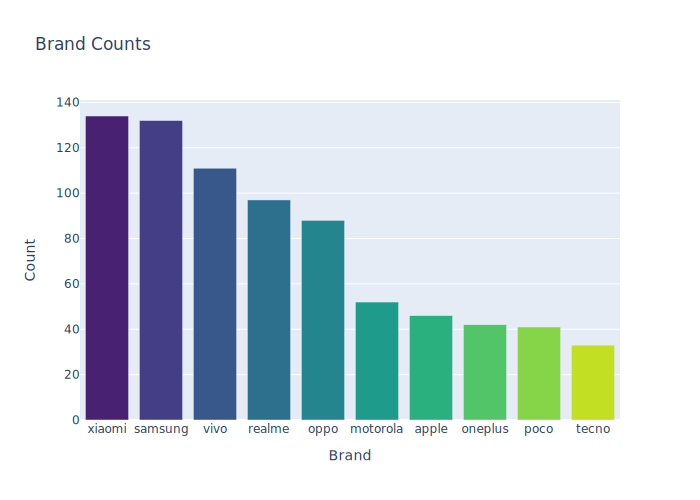

In [106]:
#TOP 10 BRANDS 

brand_counts = df1['brand'].value_counts().reset_index()   #reset_index will convert it into a df
brand_counts = brand_counts.loc[:9,]     #extracting only top 10 brands
# Rename the columns for clarity
brand_counts.columns = ['brand', 'count']
palette = sns.color_palette("viridis", n_colors=len(brand_counts))
plotly_colors = [mcolors.rgb2hex(color) for color in palette]   # colors generated by Seaborn are converted to hex format using Matplotlib's rgb2hex function. 

# Create the bar chart using Plotly Express
fig = px.bar(brand_counts, x='brand', y='count', title='Brand Counts', labels={'brand': 'Brand', 'count': 'Count'})
fig.update_traces(marker_color=plotly_colors)


# Show the plot
fig.show("svg")

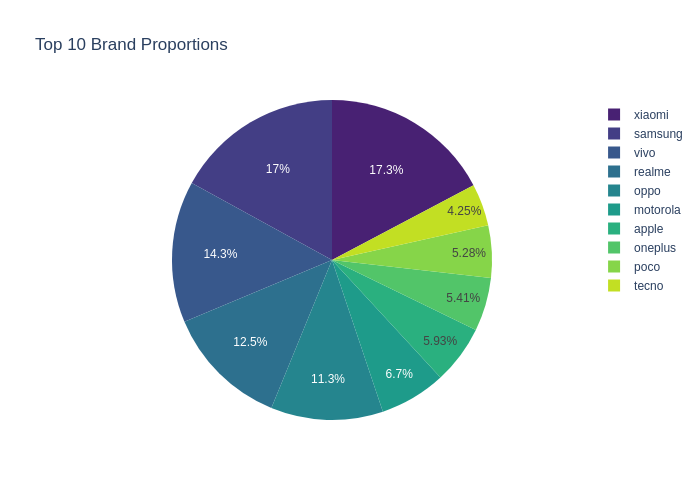

In [107]:
#Pie chart to understand the proportion

brand_counts = df1['brand'].value_counts().reset_index()   #reset_index will convert it into a df
brand_counts = brand_counts.loc[:9,]     

# Rename the columns for clarity
brand_counts.columns = ['brand', 'count']
palette = sns.color_palette("viridis", n_colors=len(brand_counts))
plotly_colors = [mcolors.rgb2hex(color) for color in palette]   # colors generated by Seaborn are converted to hex format using Matplotlib's rgb2hex function. 

fig = px.pie(brand_counts, values='count', names='brand', title='Top 10 Brand Proportions')

# Update the colors of each slice
fig.update_traces(marker=dict(colors=plotly_colors))

# Show the plot
fig.show("png")

### *Price*

***Conclusions***

- *Xiaomi has the highest count*

In [108]:
df1['price'].describe()

count       984.000000
mean      32410.336382
std       39489.087890
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       35414.000000
max      650000.000000
Name: price, dtype: float64

In [109]:
px.histogram(df1, x = 'price', nbins = 10, text_auto = True)

*high positive skewness*

In [110]:
df1['price'].skew()

6.59330478394225

In [111]:
#plotting a kde plot

px.box(df1, y='price', title='Box Plot')

*A smartphone costs 650k which is the outlier*